In [1]:
import pandas as pd

df = pd.read_csv('olist_order_reviews_dataset.csv', index_col='review_id')

df.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Exploratory Data Analysis

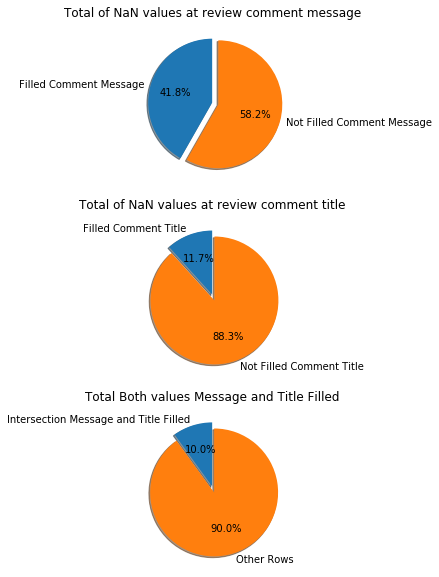

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Calculus of the number of sample of interest
total_rows = df.shape[0]
total_comments_message = df['review_comment_message'].count()
total_comments_title = df['review_comment_title'].count()
total_filled_message_and_title = df.loc[np.logical_not(df.review_comment_title.isna() | df.review_comment_message.isna())].shape[0]

# Preparing labels and values to the ploted
labels_comment_message = ['Filled Comment Message', 'Not Filled Comment Message']
sizes_comment_message = [total_comments_message, total_rows - total_comments_message]

labels_comment_title = ['Filled Comment Title', 'Not Filled Comment Title']
sizes_comment_title = [total_comments_title, total_rows - total_comments_title]

labels_message_and_title = ['Intersection Message and Title Filled', 'Other Rows']
sizes_message_and_title = [total_filled_message_and_title, total_rows - total_filled_message_and_title]
explode = [0, 0.1]

# Plot the 3 pie charts
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.title('Total of NaN values at review comment message')
plt.pie(sizes_comment_message, explode=explode, labels=labels_comment_message, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 2)
plt.title('Total of NaN values at review comment title')
plt.pie(sizes_comment_title, explode=explode, labels=labels_comment_title, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 3)
plt.title('Total Both values Message and Title Filled')
plt.pie(sizes_message_and_title, explode=explode, labels=labels_message_and_title, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

5    20646
1     9179
4     6034
3     3665
2     2229
Name: review_score, dtype: int64


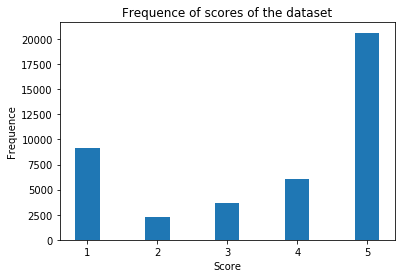

In [3]:
import matplotlib.pyplot as plt

df.dropna(subset=['review_comment_message'], inplace=True)

unique_review_score = df['review_score'].value_counts()

print(unique_review_score)

index = sorted(df['review_score'].unique())
frequence = [unique_review_score.at[x] for x in index]
bar_width = 0.35

plt.bar(index, frequence, bar_width)
plt.title('Frequence of scores of the dataset')
plt.ylabel('Frequence')
plt.xlabel('Score')
plt.show()

{'.': 30495, ',': 23201, 'o': 15549, 'e': 15424, 'produto': 14198, 'de': 11269, 'do': 11041, 'a': 10793, '!': 10776, 'não': 8821, 'que': 8440, 'prazo': 8064, 'muito': 5806, 'com': 5618, 'antes': 5453}


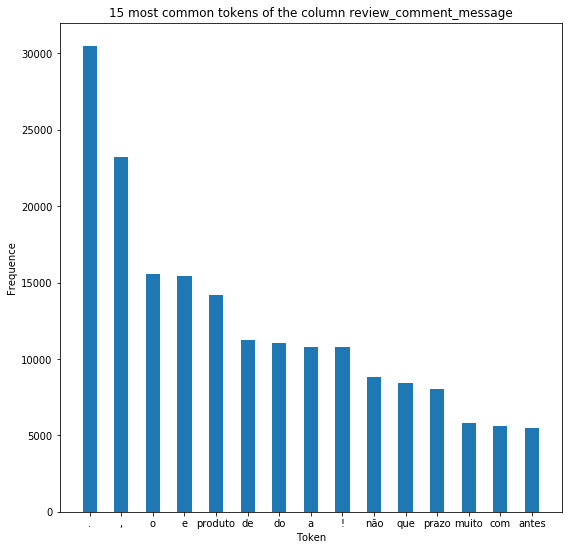

In [4]:
import itertools
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk import word_tokenize

n_most_common_words = 15

def calculate_token_distribution(n_most_common_words, column='review_comment_message'):
    tokens = df[column].apply(word_tokenize)
    tokens = list(itertools.chain(*tokens))

    frequence = FreqDist(tokens).most_common(n_most_common_words)
    return dict(frequence)

frequence = calculate_token_distribution(n_most_common_words)
print(frequence)

index = list(frequence.keys())
frequence = [frequence.get(x) for x in index]
bar_width = 0.45

plt.figure(figsize=(9, 9))
plt.bar(index, frequence, bar_width)
plt.title('{} most common tokens of the column review_comment_message'.format(n_most_common_words))
plt.ylabel('Frequence')
plt.xlabel('Token')
plt.show()

# Cleaning the Data

In [5]:
def join_title_and_message(row):
    if str(row.get('review_comment_title')) != 'nan' and str(row.get('review_comment_message')) != 'nan':
        row.at['review_comment_message'] = " ".join([str(row.get('review_comment_title', '')), str(row.get('review_comment_message', ''))])
        
    return row.get('review_comment_message')

df['review_comment_message_and_title'] = df.apply(join_title_and_message, axis=1)

df.head(20)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_message_and_title
review_id,,,,,,,
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar pela I...
8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,recomendo aparelho eficiente. no site a marca ...
4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,"Super recomendo Vendedor confiável, produto ok..."
9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,Não chegou meu produto Péssimo
d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,Ótimo Loja nota 10
0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58,obrigado pela atençao amim dispensada


In [6]:
from nltk.corpus import stopwords

abbreviated_stopwords = ['q', 'n', 'vc', 'vcs']

stopwords = stopwords.words('portuguese')
[stopwords.append(x) for x in abbreviated_stopwords]

print(stopwords)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [7]:
import unicodedata
from nltk.tokenize import RegexpTokenizer

def remove_stopwords(string):
    result_string = []    
    for letter in string.split():
        result_string.append(letter) if letter not in stopwords else None

    return " ".join(result_string)

def remove_punctuation(string):
    tokenizer = RegexpTokenizer(r'\w+')
    result_string = tokenizer.tokenize(string)
    return " ".join(result_string)

def remove_accent(string):
    nfkd_form = unicodedata.normalize('NFKD', string)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_data(input_str):
    input_str = input_str.lower()
    input_str = remove_accent(input_str)
    input_str = remove_stopwords(input_str)
    input_str = remove_punctuation(input_str)
    
    return input_str

df['cleaned_comment_message'] = df['review_comment_message_and_title'].apply(clean_data)

for i in range(10):
    print(df['review_comment_message_and_title'][i])
    print(df['cleaned_comment_message'][i])
    print()

Recebi bem antes do prazo estipulado.
recebi bem antes prazo estipulado

Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa
parabens lojas lannister adorei comprar internet seguro pratico parabens todos feliz pascoa

recomendo aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
recomendo aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nome atualizar marca correta vez aparelho

Mas um pouco ,travando...pelo valor ta Boa.

pouco travando pelo valor ta boa

Super recomendo Vendedor confiável, produto ok e entrega antes do prazo.
super recomendo vendedor confiavel produto ok entrega antes prazo

GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU
gostaria saber houve sempre recebi compra agora decpcionou

Não chegou meu produto  Péssimo
nao chegou produto pessimo

Óti

{'produto': 20089, 'nao': 13547, 'prazo': 8666, 'entrega': 7170, 'recomendo': 6102, 'chegou': 5755, 'recebi': 5749, 'antes': 5709, 'bom': 5697, 'entregue': 4068, 'veio': 3444, 'otimo': 3336, 'bem': 3160, 'qualidade': 2915, 'comprei': 2906}


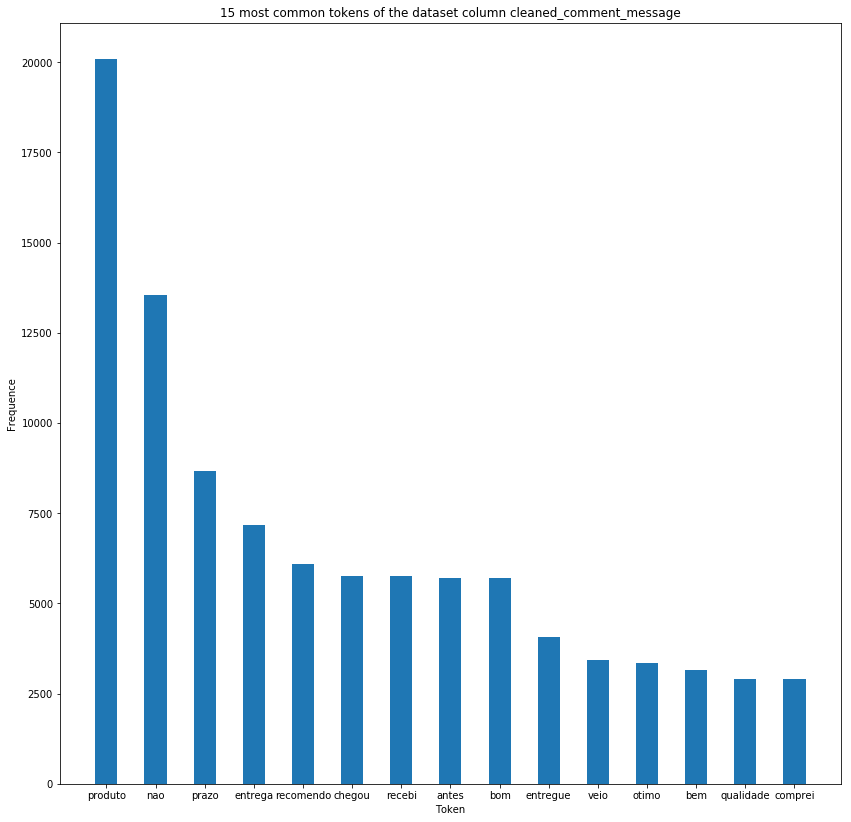

In [8]:
import matplotlib.pyplot as plt

frequence = calculate_token_distribution(n_most_common_words, 'cleaned_comment_message')
print(frequence)

index = list(frequence.keys())
frequence = [frequence.get(x) for x in index]
bar_width = 0.45

plt.figure(figsize=(14, 14))
plt.bar(index, frequence, bar_width)
plt.title('{} most common tokens of the dataset column cleaned_comment_message'.format(n_most_common_words))
plt.ylabel('Frequence')
plt.xlabel('Token')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

target = df['review_score'].values
data = df['cleaned_comment_message'].values

cv = CountVectorizer()
cv.fit(data)
data = cv.transform(data)
print(data)

  (0, 1663)	1
  (0, 2489)	1
  (0, 6692)	1
  (0, 12054)	1
  (0, 12968)	1
  (1, 1120)	1
  (1, 3795)	1
  (1, 7238)	1
  (1, 8772)	1
  (1, 9125)	1
  (1, 9443)	1
  (1, 11160)	2
  (1, 11266)	1
  (1, 12040)	1
  (1, 13989)	1
  (1, 14935)	1
  (2, 410)	1
  (2, 1729)	3
  (2, 2156)	1
  (2, 3346)	1
  (2, 4324)	1
  (2, 5771)	1
  (2, 8397)	1
  (2, 9713)	2
  (2, 10574)	1
  :	:
  (41751, 3218)	1
  (41751, 3363)	1
  (41751, 3783)	1
  (41751, 4659)	1
  (41751, 5420)	1
  (41751, 6581)	1
  (41751, 7312)	1
  (41751, 9092)	2
  (41751, 9950)	1
  (41751, 10026)	1
  (41751, 10110)	1
  (41751, 11048)	1
  (41751, 12223)	1
  (41751, 12284)	1
  (41751, 13586)	1
  (41751, 14331)	1
  (41752, 3054)	1
  (41752, 3363)	1
  (41752, 4712)	1
  (41752, 5270)	1
  (41752, 8895)	1
  (41752, 10392)	1
  (41752, 11808)	1
  (41752, 12355)	1
  (41752, 13985)	1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.35, random_state=42
)

#for c in [0.01, 0.05, 0.25, 0.5, 1]:

c = 0.05
lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)
print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.05: 0.6804434104283563
